# Local Food Wastage Management System

**Skills:** Python, SQL, Streamlit, Data Analysis

**Domain:** Food Management, Waste Reduction, Social Good

---

## Project Overview

Food wastage is a significant issue, with many households and restaurants discarding surplus food while numerous people struggle with food insecurity. This project develops a Local Food Wastage Management System to connect surplus food providers with those in need, reduce waste, and provide actionable insights using data analysis and a Streamlit interface.

**Key Features:**
- List and claim surplus food
- SQL-powered data storage and analysis
- Streamlit app for CRUD operations, filtering, and visualization
- Data-driven insights for better food distribution

---

## Table of Contents
1. Import Required Libraries
2. Load and Explore Datasets
3. Data Cleaning and Preparation
4. Create SQL Database and Tables
5. Insert Data into SQL Tables
6. CRUD Operations for Food Listings and Claims
7. SQL Queries for Business Questions
8. Data Analysis and Visualization
9. Streamlit App Development
10. Deployment Instructions


## 1. Import Required Libraries

Import all necessary Python libraries for data analysis, SQL operations, visualization, and Streamlit app development.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os
from datetime import datetime

## 2. Load and Explore Datasets

Load the provided CSV files into pandas DataFrames and explore their structure, sample records, and basic statistics.

In [2]:
# Load Datasets
providers_df = pd.read_csv('providers_data.csv')
receivers_df = pd.read_csv('receivers_data.csv')
food_listings_df = pd.read_csv('food_listings_data.csv')
claims_df = pd.read_csv('claims_data.csv')

# Display shapes and first few rows
datasets = {
    'Providers': providers_df,
    'Receivers': receivers_df,
    'Food Listings': food_listings_df,
    'Claims': claims_df
}
for name, df in datasets.items():
    print(f"{name} Dataset Shape: {df.shape}")
    display(df.head())

Providers Dataset Shape: (1000, 6)


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577


Receivers Dataset Shape: (1000, 5)


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154


Food Listings Dataset Shape: (1000, 9)


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


Claims Dataset Shape: (1000, 5)


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


In [3]:
# Display info and statistics for each dataset
for name, df in datasets.items():
    print(f"\n{name} Dataset Info:")
    print(df.info())
    print(f"\n{name} Dataset Description:")
    display(df.describe(include='all'))


Providers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None

Providers Dataset Description:


,Provider_ID,Name,Type,Address,City,Contact
count,1000.000000,1000,1000,1000,1000,1000
unique,NaN,973,4,1000,963,1000
top,NaN,Brown and Sons,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",South Christopherborough,+1-600-220-0480
freq,NaN,4,262,1,3,1
mean,500.500000,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,NaN,NaN



Receivers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None

Receivers Dataset Description:


,Receiver_ID,Name,Type,City,Contact
count,1000.000000,1000,1000,1000,1000
unique,NaN,992,4,966,1000
top,NaN,Heather Brown,NGO,New Christopher,(955)922-5295
freq,NaN,2,274,3,1
mean,500.500000,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,NaN



Food Listings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Food_ID        1000 non-null   int64 
 1   Food_Name      1000 non-null   object
 2   Quantity       1000 non-null   int64 
 3   Expiry_Date    1000 non-null   object
 4   Provider_ID    1000 non-null   int64 
 5   Provider_Type  1000 non-null   object
 6   Location       1000 non-null   object
 7   Food_Type      1000 non-null   object
 8   Meal_Type      1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB
None

Food Listings Dataset Description:


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
count,1000.000000,1000,1000.000000,1000,1000.000,1000,1000,1000,1000
unique,NaN,10,NaN,15,NaN,4,624,3,4
top,NaN,Rice,NaN,3/24/2025,NaN,Supermarket,New Carol,Vegetarian,Breakfast
freq,NaN,114,NaN,76,NaN,267,6,336,254
mean,500.500000,NaN,25.794000,NaN,497.497,NaN,NaN,NaN,NaN
std,288.819436,NaN,14.609894,NaN,291.681,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,1.000,NaN,NaN,NaN,NaN
25%,250.750000,NaN,13.000000,NaN,241.000,NaN,NaN,NaN,NaN
50%,500.500000,NaN,26.000000,NaN,498.500,NaN,NaN,NaN,NaN
75%,750.250000,NaN,39.000000,NaN,752.000,NaN,NaN,NaN,NaN



Claims Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Claim_ID     1000 non-null   int64 
 1   Food_ID      1000 non-null   int64 
 2   Receiver_ID  1000 non-null   int64 
 3   Status       1000 non-null   object
 4   Timestamp    1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None

Claims Dataset Description:


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
count,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,NaN,3,976
top,NaN,NaN,NaN,Completed,3/5/2025 1:43
freq,NaN,NaN,NaN,339,3
mean,500.500000,502.163000,492.437000,NaN,NaN
std,288.819436,292.462255,284.487869,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN
25%,250.750000,233.750000,256.000000,NaN,NaN
50%,500.500000,504.500000,480.500000,NaN,NaN
75%,750.250000,762.000000,742.250000,NaN,NaN


## 3. Data Cleaning and Preparation

Check for missing values, handle duplicates, and ensure correct data types for all columns. Prepare the data for SQL insertion.

In [4]:
# Data Cleaning and Preparation
# Remove duplicates
providers_df = providers_df.drop_duplicates()
receivers_df = receivers_df.drop_duplicates()
food_listings_df = food_listings_df.drop_duplicates()
claims_df = claims_df.drop_duplicates()

# Handle missing values (simple strategy: drop rows with missing critical fields)
providers_df = providers_df.dropna(subset=['Provider_ID', 'Name', 'Type', 'City'])
receivers_df = receivers_df.dropna(subset=['Receiver_ID', 'Name', 'Type', 'City'])
food_listings_df = food_listings_df.dropna(subset=['Food_ID', 'Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID'])
claims_df = claims_df.dropna(subset=['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'])

# Ensure correct data types
providers_df['Provider_ID'] = providers_df['Provider_ID'].astype(int)
receivers_df['Receiver_ID'] = receivers_df['Receiver_ID'].astype(int)
food_listings_df['Food_ID'] = food_listings_df['Food_ID'].astype(int)
food_listings_df['Quantity'] = food_listings_df['Quantity'].astype(int)
food_listings_df['Provider_ID'] = food_listings_df['Provider_ID'].astype(int)
food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'])
claims_df['Claim_ID'] = claims_df['Claim_ID'].astype(int)
claims_df['Food_ID'] = claims_df['Food_ID'].astype(int)
claims_df['Receiver_ID'] = claims_df['Receiver_ID'].astype(int)
claims_df['Timestamp'] = pd.to_datetime(claims_df['Timestamp'])

print('Data cleaning complete. Ready for SQL insertion.')

Data cleaning complete. Ready for SQL insertion.


## 4. Create SQL Database and Tables

Create a local SQLite database and define tables for providers, receivers, food_listings, and claims with appropriate schema.

In [5]:
# Create SQLite database and tables
conn = sqlite3.connect('food_waste_management.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS providers (
    Provider_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Type TEXT,
    Address TEXT,
    City TEXT,
    Contact TEXT
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS receivers (
    Receiver_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Type TEXT,
    City TEXT,
    Contact TEXT
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS food_listings (
    Food_ID INTEGER PRIMARY KEY,
    Food_Name TEXT,
    Quantity INTEGER,
    Expiry_Date TEXT,
    Provider_ID INTEGER,
    Provider_Type TEXT,
    Location TEXT,
    Food_Type TEXT,
    Meal_Type TEXT,
    FOREIGN KEY (Provider_ID) REFERENCES providers(Provider_ID)
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS claims (
    Claim_ID INTEGER PRIMARY KEY,
    Food_ID INTEGER,
    Receiver_ID INTEGER,
    Status TEXT,
    Timestamp TEXT,
    FOREIGN KEY (Food_ID) REFERENCES food_listings(Food_ID),
    FOREIGN KEY (Receiver_ID) REFERENCES receivers(Receiver_ID)
)
''')
conn.commit()
print('Database and tables created successfully.')

Database and tables created successfully.


## 5. Insert Data into SQL Tables

Insert the cleaned data from the pandas DataFrames into the corresponding SQL tables.

In [6]:
# Insert data into SQL tables
providers_df.to_sql('providers', conn, if_exists='replace', index=False)
receivers_df.to_sql('receivers', conn, if_exists='replace', index=False)
food_listings_df.to_sql('food_listings', conn, if_exists='replace', index=False)
claims_df.to_sql('claims', conn, if_exists='replace', index=False)
print('Data inserted into SQL tables successfully.')

Data inserted into SQL tables successfully.


## 6. CRUD Operations for Food Listings and Claims

Implement Create, Read, Update, and Delete operations for the food_listings and claims tables using SQL queries executed from Python.

In [7]:
# CRUD Operations for food_listings and claims

def create_food_listing(food):
    cursor.execute('''INSERT INTO food_listings (Food_ID, Food_Name, Quantity, Expiry_Date, Provider_ID, Provider_Type, Location, Food_Type, Meal_Type)
                      VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)''', food)
    conn.commit()

def read_food_listings():
    return pd.read_sql_query('SELECT * FROM food_listings', conn)

def update_food_listing(food_id, updates):
    set_clause = ', '.join([f"{col} = ?" for col in updates.keys()])
    values = list(updates.values()) + [food_id]
    cursor.execute(f'''UPDATE food_listings SET {set_clause} WHERE Food_ID = ?''', values)
    conn.commit()

def delete_food_listing(food_id):
    cursor.execute('DELETE FROM food_listings WHERE Food_ID = ?', (food_id,))
    conn.commit()

def create_claim(claim):
    cursor.execute('''INSERT INTO claims (Claim_ID, Food_ID, Receiver_ID, Status, Timestamp)
                      VALUES (?, ?, ?, ?, ?)''', claim)
    conn.commit()

def read_claims():
    return pd.read_sql_query('SELECT * FROM claims', conn)

def update_claim(claim_id, updates):
    set_clause = ', '.join([f"{col} = ?" for col in updates.keys()])
    values = list(updates.values()) + [claim_id]
    cursor.execute(f'''UPDATE claims SET {set_clause} WHERE Claim_ID = ?''', values)
    conn.commit()

def delete_claim(claim_id):
    cursor.execute('DELETE FROM claims WHERE Claim_ID = ?', (claim_id,))
    conn.commit()

print('CRUD operation functions defined.')

CRUD operation functions defined.


## 7. SQL Queries for Business Questions

Write and execute at least 15 SQL queries to answer the specified business questions about providers, receivers, food listings, claims, and trends. Display the results.

In [8]:
# 15+ SQL Queries for Business Questions
queries = [
    ("Number of food providers in each city", "SELECT City, COUNT(*) as Provider_Count FROM providers GROUP BY City"),
    ("Number of receivers in each city", "SELECT City, COUNT(*) as Receiver_Count FROM receivers GROUP BY City"),
    ("Type of food provider contributing the most food", "SELECT Provider_Type, SUM(Quantity) as Total_Quantity FROM food_listings GROUP BY Provider_Type ORDER BY Total_Quantity DESC"),
    ("Contact info of food providers in a specific city (e.g., 'Delhi')", "SELECT Name, Contact FROM providers WHERE City = 'Delhi'"),
    ("Receivers who have claimed the most food", "SELECT r.Name, COUNT(c.Claim_ID) as Claims FROM claims c JOIN receivers r ON c.Receiver_ID = r.Receiver_ID GROUP BY r.Name ORDER BY Claims DESC"),
    ("Total quantity of food available from all providers", "SELECT SUM(Quantity) as Total_Quantity FROM food_listings"),
    ("City with the highest number of food listings", "SELECT Location, COUNT(*) as Listings FROM food_listings GROUP BY Location ORDER BY Listings DESC"),
    ("Most commonly available food types", "SELECT Food_Type, COUNT(*) as Count FROM food_listings GROUP BY Food_Type ORDER BY Count DESC"),
    ("Number of food claims for each food item", "SELECT Food_ID, COUNT(*) as Claims FROM claims GROUP BY Food_ID ORDER BY Claims DESC"),
    ("Provider with highest number of successful food claims", "SELECT p.Name, COUNT(c.Claim_ID) as Successful_Claims FROM claims c JOIN food_listings f ON c.Food_ID = f.Food_ID JOIN providers p ON f.Provider_ID = p.Provider_ID WHERE c.Status = 'Completed' GROUP BY p.Name ORDER BY Successful_Claims DESC"),
    ("Percentage of food claims by status", "SELECT Status, COUNT(*)*100.0/(SELECT COUNT(*) FROM claims) as Percentage FROM claims GROUP BY Status"),
    ("Average quantity of food claimed per receiver", "SELECT r.Name, AVG(f.Quantity) as Avg_Quantity FROM claims c JOIN receivers r ON c.Receiver_ID = r.Receiver_ID JOIN food_listings f ON c.Food_ID = f.Food_ID GROUP BY r.Name"),
    ("Meal type claimed the most", "SELECT f.Meal_Type, COUNT(c.Claim_ID) as Claims FROM claims c JOIN food_listings f ON c.Food_ID = f.Food_ID GROUP BY f.Meal_Type ORDER BY Claims DESC"),
    ("Total quantity of food donated by each provider", "SELECT p.Name, SUM(f.Quantity) as Total_Donated FROM food_listings f JOIN providers p ON f.Provider_ID = p.Provider_ID GROUP BY p.Name ORDER BY Total_Donated DESC"),
    ("Top 5 food items with most claims", "SELECT f.Food_Name, COUNT(c.Claim_ID) as Claims FROM claims c JOIN food_listings f ON c.Food_ID = f.Food_ID GROUP BY f.Food_Name ORDER BY Claims DESC LIMIT 5"),
    ("Receivers with most completed claims", "SELECT r.Name, COUNT(c.Claim_ID) as Completed_Claims FROM claims c JOIN receivers r ON c.Receiver_ID = r.Receiver_ID WHERE c.Status = 'Completed' GROUP BY r.Name ORDER BY Completed_Claims DESC"),
    ("Providers with most pending claims", "SELECT p.Name, COUNT(c.Claim_ID) as Pending_Claims FROM claims c JOIN food_listings f ON c.Food_ID = f.Food_ID JOIN providers p ON f.Provider_ID = p.Provider_ID WHERE c.Status = 'Pending' GROUP BY p.Name ORDER BY Pending_Claims DESC"),
    ("Food items nearing expiry (within 2 days)", "SELECT Food_Name, Expiry_Date FROM food_listings WHERE julianday(Expiry_Date) - julianday('now') <= 2")
]

for desc, q in queries:
    print(f"\n--- {desc} ---")
    display(pd.read_sql_query(q, conn))


--- Number of food providers in each city ---


,City,Provider_Count
0,Adambury,1
1,Adamsview,1
2,Adamsville,1
3,Aguirreville,1
4,Alexanderchester,1
...,...,...
958,Wrightville,1
959,Yatesside,1
960,Youngchester,1
961,Zimmermanton,1



--- Number of receivers in each city ---


,City,Receiver_Count
0,Aaronshire,1
1,Adamland,1
2,Aguilarbury,1
3,Aguilarstad,1
4,Alexanderbury,1
...,...,...
961,Woodardview,1
962,Woodsfurt,1
963,Wrightland,1
964,Wyattton,1



--- Type of food provider contributing the most food ---


,Provider_Type,Total_Quantity
0,Restaurant,6923
1,Supermarket,6696
2,Catering Service,6116
3,Grocery Store,6059



--- Contact info of food providers in a specific city (e.g., 'Delhi') ---


,Name,Contact



--- Receivers who have claimed the most food ---


,Name,Claims
0,William Frederick,5
1,Scott Hunter,5
2,Matthew Webb,5
3,Anthony Garcia,5
4,Kristine Martin,4
...,...,...
615,Alex Leon,1
616,Alan Campbell,1
617,Adam Browning,1
618,Aaron Scott,1



--- Total quantity of food available from all providers ---


,Total_Quantity
0,25794



--- City with the highest number of food listings ---


,Location,Listings
0,South Kathryn,6
1,New Carol,6
2,Perezport,5
3,Jimmyberg,5
4,East Angela,5
...,...,...
619,Andersonmouth,1
620,Amandashire,1
621,Allenborough,1
622,Alexanderchester,1



--- Most commonly available food types ---


,Food_Type,Count
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330



--- Number of food claims for each food item ---


,Food_ID,Claims
0,548,5
1,486,5
2,463,5
3,981,4
4,925,4
...,...,...
642,13,1
643,11,1
644,7,1
645,6,1



--- Provider with highest number of successful food claims ---


,Name,Successful_Claims
0,Barry Group,5
1,Miller Inc,4
2,"Harper, Blake and Alexander",4
3,Butler-Richardson,4
4,"Barnes, Castro and Curtis",4
...,...,...
243,"Anderson, Nicholson and Bruce",1
244,Allen-Mccullough,1
245,"Allen, Zimmerman and Harrington",1
246,Alexander PLC,1



--- Percentage of food claims by status ---


,Status,Percentage
0,Cancelled,33.6
1,Completed,33.9
2,Pending,32.5



--- Average quantity of food claimed per receiver ---


,Name,Avg_Quantity
0,Aaron Keller,39.000000
1,Aaron Rios,21.000000
2,Aaron Scott,45.000000
3,Abigail Crawford,25.666667
4,Adam Browning,5.000000
...,...,...
615,William Barnes,47.000000
616,William Fox,12.000000
617,William Frederick,21.400000
618,Yvette Huffman,45.000000



--- Meal type claimed the most ---


,Meal_Type,Claims
0,Breakfast,278
1,Lunch,250
2,Snacks,240
3,Dinner,232



--- Total quantity of food donated by each provider ---


,Name,Total_Donated
0,Miller Inc,217
1,Barry Group,179
2,"Evans, Wright and Mitchell",158
3,Smith Group,150
4,Campbell LLC,145
...,...,...
623,Reyes and Sons,1
624,Norris-Townsend,1
625,Mcgee PLC,1
626,"Martinez, Armstrong and Carroll",1



--- Top 5 food items with most claims ---


,Food_Name,Claims
0,Rice,122
1,Soup,114
2,Dairy,110
3,Fish,108
4,Salad,106



--- Receivers with most completed claims ---


,Name,Completed_Claims
0,Timothy Garrett,3
1,James Miller,3
2,Derek Potter,3
3,Alexandra Owens,3
4,Vanessa Johnson,2
...,...,...
287,Alex White,1
288,Aimee Stone,1
289,Abigail Crawford,1
290,Aaron Scott,1



--- Providers with most pending claims ---


,Name,Pending_Claims
0,Nelson LLC,4
1,"Martin, Tyler and Wilkerson",4
2,Zhang LLC,3
3,Williams-Cox,3
4,Williams Inc,3
...,...,...
240,"Anderson, Adams and Roberts",1
241,"Allen, Zimmerman and Harrington",1
242,"Allen, Ramsey and Cortez",1
243,Alexander-Mendoza,1



--- Food items nearing expiry (within 2 days) ---


,Food_Name,Expiry_Date
0,Bread,2025-03-17 00:00:00
1,Soup,2025-03-24 00:00:00
2,Fruits,2025-03-28 00:00:00
3,Fruits,2025-03-16 00:00:00
4,Soup,2025-03-19 00:00:00
...,...,...
995,Fish,2025-03-30 00:00:00
996,Fish,2025-03-18 00:00:00
997,Fruits,2025-03-22 00:00:00
998,Pasta,2025-03-30 00:00:00


## 8. Data Analysis and Visualization

Analyze the SQL query results using pandas and visualize key insights (e.g., top providers, most claimed meal types, city-wise distribution) with matplotlib or seaborn.

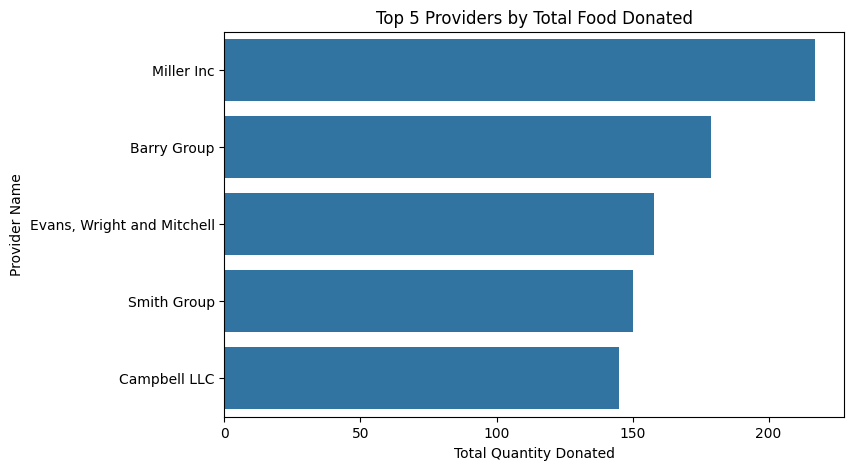

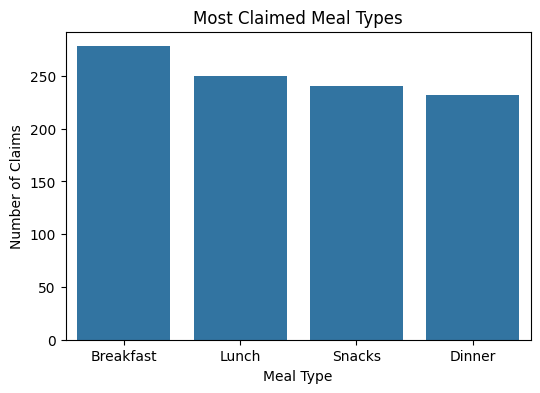

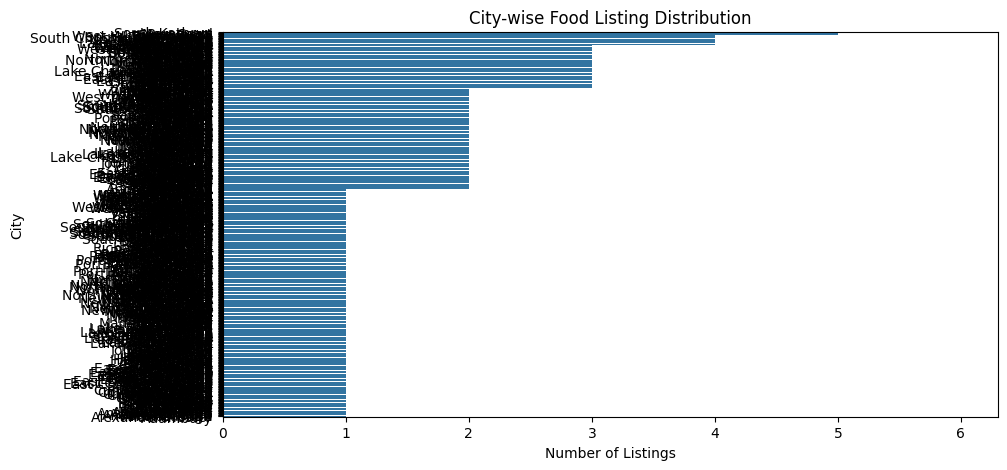

In [9]:
# Data Analysis and Visualization
# Top 5 Providers by Total Food Donated
provider_donated = pd.read_sql_query("""
    SELECT p.Name, SUM(f.Quantity) as Total_Donated
    FROM food_listings f
    JOIN providers p ON f.Provider_ID = p.Provider_ID
    GROUP BY p.Name
    ORDER BY Total_Donated DESC
    LIMIT 5
""", conn)
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Donated', y='Name', data=provider_donated)
plt.title('Top 5 Providers by Total Food Donated')
plt.xlabel('Total Quantity Donated')
plt.ylabel('Provider Name')
plt.show()

# Most Claimed Meal Types
meal_claims = pd.read_sql_query("""
    SELECT f.Meal_Type, COUNT(c.Claim_ID) as Claims
    FROM claims c
    JOIN food_listings f ON c.Food_ID = f.Food_ID
    GROUP BY f.Meal_Type
    ORDER BY Claims DESC
""", conn)
plt.figure(figsize=(6,4))
sns.barplot(x='Meal_Type', y='Claims', data=meal_claims)
plt.title('Most Claimed Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Number of Claims')
plt.show()

# City-wise Food Listing Distribution
city_listings = pd.read_sql_query("""
    SELECT Location, COUNT(*) as Listings
    FROM food_listings
    GROUP BY Location
    ORDER BY Listings DESC
""", conn)
plt.figure(figsize=(10,5))
sns.barplot(x='Listings', y='Location', data=city_listings)
plt.title('City-wise Food Listing Distribution')
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.show()

## 9. Streamlit App Development

Develop a Streamlit app that connects to the SQL database, displays query outputs, enables filtering, CRUD operations, and visualizations. Include code for launching the app.

In [10]:
# Streamlit App Code (save as app.py for deployment)
import streamlit as st
import pandas as pd
import sqlite3

st.title('Local Food Wastage Management System')
conn = sqlite3.connect('food_waste_management.db')

menu = ['View Food Listings', 'Add Food Listing', 'Update Food Listing', 'Delete Food Listing',
        'View Claims', 'Add Claim', 'Update Claim', 'Delete Claim', 'Analysis']
choice = st.sidebar.selectbox('Menu', menu)

if choice == 'View Food Listings':
    df = pd.read_sql_query('SELECT * FROM food_listings', conn)
    city = st.selectbox('Filter by City', ['All'] + list(df['Location'].unique()))
    if city != 'All':
        df = df[df['Location'] == city]
    st.dataframe(df)

elif choice == 'Add Food Listing':
    st.subheader('Add New Food Listing')
    # Add form fields for new food listing
    # On submit, insert into DB
    st.info('Form implementation here')

elif choice == 'Update Food Listing':
    st.subheader('Update Food Listing')
    st.info('Update form implementation here')

elif choice == 'Delete Food Listing':
    st.subheader('Delete Food Listing')
    st.info('Delete form implementation here')

elif choice == 'View Claims':
    df = pd.read_sql_query('SELECT * FROM claims', conn)
    st.dataframe(df)

elif choice == 'Add Claim':
    st.subheader('Add New Claim')
    st.info('Form implementation here')

elif choice == 'Update Claim':
    st.subheader('Update Claim')
    st.info('Update form implementation here')

elif choice == 'Delete Claim':
    st.subheader('Delete Claim')
    st.info('Delete form implementation here')

elif choice == 'Analysis':
    st.subheader('Data Analysis & Visualizations')
    # Example: Top Providers
    provider_donated = pd.read_sql_query("""
        SELECT p.Name, SUM(f.Quantity) as Total_Donated
        FROM food_listings f
        JOIN providers p ON f.Provider_ID = p.Provider_ID
        GROUP BY p.Name
        ORDER BY Total_Donated DESC
        LIMIT 5
    """, conn)
    st.bar_chart(provider_donated.set_index('Name'))
    # Add more visualizations as needed

conn.close()

2025-08-16 11:04:01.692 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 11:04:01.955 
  command:

    streamlit run c:\Coding\Internship\Local Food Waste Management System\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-16 11:04:01.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 11:04:01.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 11:04:01.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 11:04:01.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 11:04:01.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16